# Powertrain for UAV

In [208]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from scipy.integrate import quad, ode, odeint
from scipy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import gym
import json
from systems.powertrain import *
np.random.seed(43)

## Create a battery from the latest checkpoint

In [174]:
checkpoint = load_checkpoint(battery_name='battery1')
battery1 = ContinuousBatteryCell(**checkpoint)
print(battery1.age, battery1.state)

[INFO] loading checkpoint: params\battery1\14Dec20_20-21-43.json
Using [ battery1 - 14Dec20_20-21-43] parameters
2.817760515411931 [1.001030690606704, 0.9941291287762324, 4.2492581343647355, 4.263765749004835]


In [175]:
checkpoint = load_checkpoint(battery_name='battery2')
battery2 = ContinuousBatteryCell(**checkpoint)
print(battery2.age, battery2.state)

[INFO] loading checkpoint: params\battery2\14Dec20_20-21-43.json
Using [ battery2 - 14Dec20_18-11-32] parameters
3.817760515411931 [0.9, 0.904, 4.04, 4.063]


## Create a battery from a specific checkpoint

In [176]:
checkpoint = load_checkpoint(battery_name='battery1', checkpoint="14Dec20_11-59-35.json")
battery1a = ContinuousBatteryCell(**checkpoint)
print(battery1a.age, battery1a.state)

[INFO] loading checkpoint: params//battery1/14Dec20_11-59-35.json
Using [ battery1 - 14Dec20_11-59-35] parameters
1.8648193145749887 [0.013040650306060001, 0.023071661302954887, 3.1558323065213263, 3.164794412079941]


## Create a new battery from the default template

In [177]:
checkpoint = load_checkpoint(battery_name="base")
base= ContinuousBatteryCell(**checkpoint)
print(base.age, base.state)

[INFO] loading checkpoint: params\base\battery_params.json
Using [ base - 12_30_here] parameters
0.0 [1.0, 1.0, 4.2, 4.2]


In [178]:
checkpoint = load_checkpoint(battery_name="lithium1")
lithium1 = ContinuousBatteryCell(**checkpoint)
print(lithium1.age, lithium1.state)

[INFO] loading checkpoint: params\lithium1\battery_params.json
Using [ lithium1 - 12_30_here] parameters
0.0 [1.0, 1.0, 4.2, 4.2]


## create an array of battery cells

In [196]:
batteries = [battery1, battery2, battery1a, base, lithium1]
i = 0
for battery in batteries:
    print(i, battery.name, battery.age, battery.state[1])
    i = i + 1

0 battery1 213.68030101195475 0.9795575524577389
1 battery2 46.16070249361913 0.9767331174433669
2 battery1 21.403856245364924 0.9823381554912158
3 base 75.67949355556544 0.9787327757842873
4 lithium1 23.730822313723085 0.98184051552616


## looks like a battery needs charged

In [195]:
# this would be nice!
# batteries[2].charge(-3.8695)
battery = batteries[2]
ct = 1/3600*battery.period
dt = battery.nsteps(ct)

i = 0
for battery in batteries:
    battery.charge(dt, -3.8695)
    print(i, battery.name, battery.age, battery.state[1])
    i = i + 1

0 battery1 213.68030101195475 0.9795575524577389
1 battery2 46.16070249361913 0.9767331174433669
2 battery1 21.403856245364924 0.9823381554912158
3 base 75.67949355556544 0.9787327757842873
4 lithium1 23.730822313723085 0.98184051552616


## Cycle the batteries

run: 0	Q: 3.326	R0: 0.040	avg_load: 6.413	cycle_time: 2984	age: 213.615	eol: 412


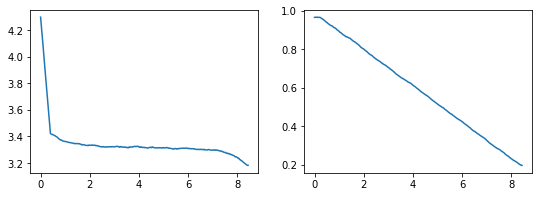

run: 0	Q: 3.815	R0: 0.014	avg_load: 6.420	cycle_time: 3922	age: 46.094	eol: 412


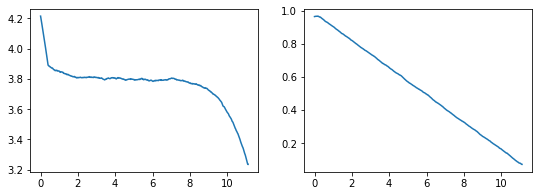

run: 0	Q: 3.848	R0: 0.013	avg_load: 6.422	cycle_time: 4002	age: 21.337	eol: 412


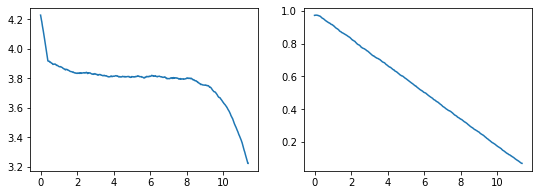

run: 0	Q: 3.764	R0: 0.013	avg_load: 6.421	cycle_time: 3857	age: 75.612	eol: 412


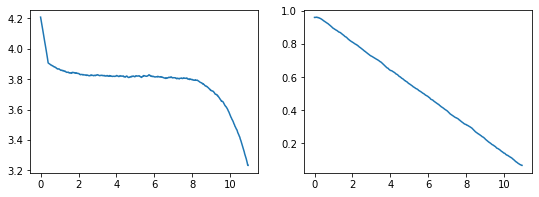

run: 0	Q: 3.845	R0: 0.014	avg_load: 6.422	cycle_time: 3937	age: 23.664	eol: 412


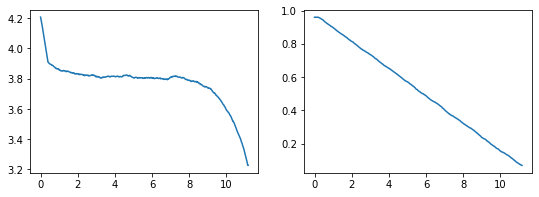

In [194]:
for battery in batteries:
    res = cycle_test(cell=battery, dt=1.0, c=18.8695,random_load=False, verbose=1,show_plot=False, reset=False, action=1)
    f = plt.figure(figsize=(9,3))
    plt.subplot(1,2,1)
    plt.plot(res['dt'], res['v_hat'])
    plt.subplot(1,2,2)
    plt.plot(res['dt'], res['z_hat'])
    plt.show()

## Cycle the batteries non deterministically, and replot
- batteries are used according to a distribution

base-3
run: 0	Q: 3.838	R0: 0.014	avg_load: 0.000	cycle_time: 0	age: 29.678	eol: 412
run: 0	Q: 3.838	R0: 0.014	avg_load: 3.870	cycle_time: 3373	age: 29.745	eol: 412
battery1-0
run: 0	Q: 3.669	R0: 0.013	avg_load: 0.000	cycle_time: 0	age: 118.055	eol: 412
run: 0	Q: 3.669	R0: 0.013	avg_load: 3.870	cycle_time: 3232	age: 118.122	eol: 412
battery1-0
run: 1	Q: 3.668	R0: 0.013	avg_load: 24.700	cycle_time: 500	age: 118.969	eol: 412
run: 1	Q: 3.666	R0: 0.013	avg_load: 3.870	cycle_time: 3190	age: 119.036	eol: 412
battery1-0
run: 2	Q: 3.666	R0: 0.013	avg_load: 27.377	cycle_time: 448	age: 119.947	eol: 412
run: 2	Q: 3.664	R0: 0.013	avg_load: 3.870	cycle_time: 3167	age: 120.014	eol: 412
battery1-0
run: 3	Q: 3.664	R0: 0.013	avg_load: 25.502	cycle_time: 482	age: 120.883	eol: 412
run: 3	Q: 3.661	R0: 0.013	avg_load: 3.870	cycle_time: 3175	age: 120.950	eol: 412
battery1-0
run: 4	Q: 3.661	R0: 0.013	avg_load: 23.191	cycle_time: 533	age: 121.746	eol: 412
run: 4	Q: 3.659	R0: 0.013	avg_load: 3.870	cycle_time: 3

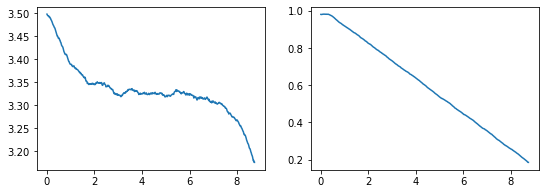

run: 0	Q: 3.816	R0: 0.014	avg_load: 18.870	cycle_time: 687	age: 46.022	eol: 412


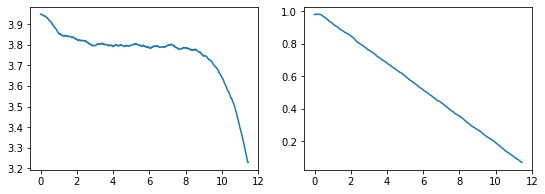

run: 0	Q: 3.849	R0: 0.013	avg_load: 18.870	cycle_time: 695	age: 21.264	eol: 412


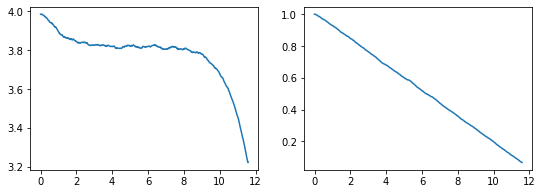

run: 0	Q: 3.765	R0: 0.013	avg_load: 18.870	cycle_time: 680	age: 75.541	eol: 412


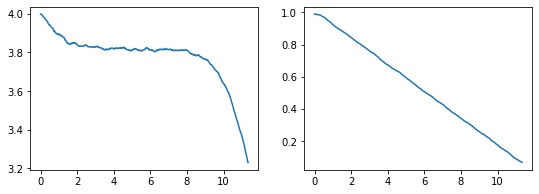

run: 0	Q: 3.846	R0: 0.013	avg_load: 18.870	cycle_time: 694	age: 23.592	eol: 412


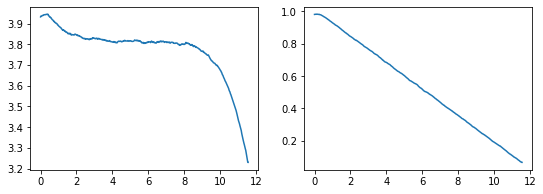

In [191]:
# battery usage distribution
P = [.55, .1, .05, .25, .05]
idx = 0
j = [0,0,0,0,0]

# select the battery
for i in range(0, 200):
    choice = np.random.random()
    if choice < P[0]:
        battery = batteries[0]
        idx = 0
    elif choice < (P[0] + P[1]):
        battery = batteries[1]
        idx = 1
    elif choice < (P[0] + P[1] + P[2]):
        battery = batteries[2]
        idx = 2
    elif choice < (P[0] + P[1] + P[2] + P[3]):
        battery = batteries[3]
        idx = 3
    else:
        battery = batteries[4]
        idx = 4
    print(f"{battery.name}-{idx}")
    # discharge
    cycle_test(cell=battery, dt=1.0, c=26.3, random_load=True, verbose=1,show_plot=False, reset=False, action=1, run_num=j[idx])
    # charge
    cycle_test(cell=battery, dt=1.0, random_load=False, verbose=1, show_plot=False, reset=False, action=0, run_num=j[idx])
    # increment
    j[idx] = j[idx] + 1
    
for battery in batteries:
    res = cycle_test(cell=battery, dt=1.0, c=18.8695,random_load=False, verbose=1,show_plot=False, reset=False, action=1)
    f = plt.figure(figsize=(9,3))
    plt.subplot(1,2,1)
    plt.plot(res['dt'], res['v_hat'])
    plt.subplot(1,2,2)
    plt.plot(res['dt'], res['z_hat'])
    plt.show()

## Save battery checkpoints

In [221]:
lithium1.save_checkpoint()
battery1.save_checkpoint()

### The Continuous Battery Cell
Load profiles, parameters
- predefined curves must be derived emperically 

In [ ]:
# only if curves need updated
# # load the battery curves
# battery_profiles = get_battery_curves('soc_ocv.csv', 'R0_degradation.csv', 'Q_degradation.csv')
# battery_profiles
# with open('params/battery_curves.json', 'w') as f:
#     json.dump(battery_profiles, f)

#### load battery params from json [DEPRECIATED]

In [199]:
#with open('params/battery_params.json') as f:
#with open('params/tmp/battery1_0-0_3-8695.json') as f:
with open('params/battery1/14Dec20_20-21-43.json') as f:
    battery_params = json.load(f)
#battery_params

### create the battery cell

In [200]:
cbcell = ContinuousBatteryCell(**battery_params)
cbcell.reset()

Using [ battery1 - 14Dec20_20-21-43] parameters


In [ ]:
#cbcell.__dict__

### basic usage  [DEPRECIATED]

In [201]:
dt = cbcell.nsteps(1/3600*cbcell.period)

#c = -3.8695
avg_c = 30.895
np.random.normal(.985, .01)

0.9875739992534469

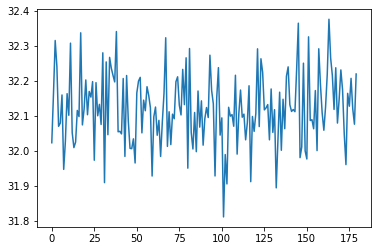

In [202]:
reserve = 1.25
length = 180
c = np.zeros((length,1))
x = np.linspace(0, 2 * np.pi, int(cbcell.z * 100) + 1)
amp = np.random.uniform(1,2)
pwr = np.random.uniform(.8, 1.4)
fct = np.random.uniform(3,5)
ofs = np.random.uniform(int(avg_c)-3,int(avg_c)+3)
y = np.sin(amp*-x**pwr)/fct+ofs
for i in range(0, length):
    c[i] = np.random.normal(y[int(cbcell.z * 100)], .1)
plt.plot(c)
plt.show()

reserve: 3.8
3.4879336070260303


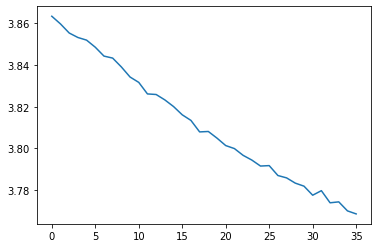

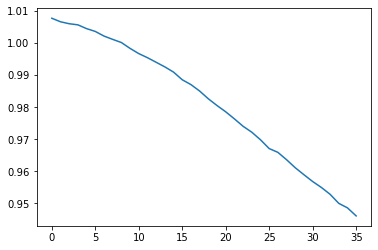

In [203]:
vs = np.zeros((length,1))
zs = np.zeros((length,1))
i = 0
print(f"reserve: {cbcell.eod*reserve}")
while cbcell.state[3] > cbcell.eod*reserve:
    obs, reward, done, info = cbcell.step(dt, c[i])
    zs[i] = obs[1]
    vs[i] = cbcell.ocv # filtered voltage
    i = i + 1
    if done:
        print("done")
        break
    if i == len(c):
        print("cycle finished")
        break
print(cbcell.age)
plt.plot(np.arange(0,i,1),vs[0:i])
plt.show()
plt.plot(np.arange(0,i,1),zs[0:i])

In [204]:
cbcell.step(dt, 3.8695)
print(cbcell.state, cbcell.age)

[0.9210237234825854, 0.9439124013764123, 4.0730075463512705, 3.806703546776833] 3.4921725826567367


### non linear load-dependant aging

### plot the battery profile curves
- q degradation
- r0 degradation
- soc ocv curve

4.052408561253653
0.013503516031979206
3.865514026190776


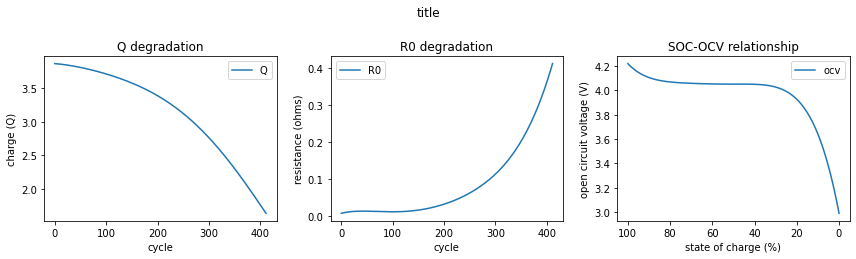

In [92]:
# shows that profile curves are continuous
print(cbcell.get_v(z=45.32434))
print(cbcell.get_r0(age=123.232))
print(cbcell.get_q(age=.973))

plot_q = np.array([np.arange(0, cbcell.eol), np.polyval(cbcell.q_coef, np.arange(0, cbcell.eol))])
plot_r = np.array([np.arange(0, cbcell.eol), np.polyval(cbcell.r0_coef, np.arange(0, cbcell.eol))])
plot_z = np.array([np.arange(0, 101), np.polyval(cbcell.z_coef, np.arange(0, 101))])

three_plot(plot1=plot_q, plot2=plot_r, plot3=plot_z, 
           label1=["Q"], label2=["R0"], label3=["ocv"], 
           title1="Q degradation", title2="R0 degradation", title3="SOC-OCV relationship",
           axes1=["cycle", "charge (Q)"], axes2=["cycle", "resistance (ohms)"], axes3=["state of charge (%)", "open circuit voltage (V)"],
           invert=[0,0,1], save=True, filename="figures/battery_profile_curves.png")

### EOD simulation

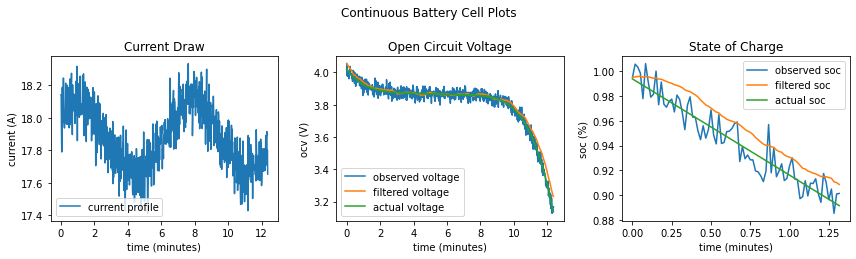

In [214]:
# simulate until EOD
res = cycle_test(cell=cbcell, dt=1.0, c=18.8695,random_load=True, verbose=0,show_plot=True, reset=False, action=1)#, save_plot=True, file_name="figures/continuous_cell_test2.png")

### Charging simulation

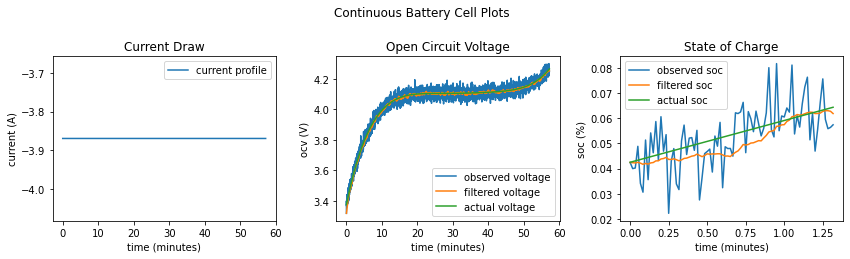

In [213]:
res = cycle_test(cell=cbcell, random_load=False, verbose=0, show_plot=True, reset=False, action=0)#, save_plot=True, file_name="figures/continuous_cell_charging.png")

### EOL simulation

Using [ battery1 - 14Dec20_20-21-43] parameters
run: 1	Q: 3.864	R0: 0.011	avg_load: 9.342	cycle_time: 1440	age: 3.178	eol: 412
run: 1	Q: 3.864	R0: 0.011	avg_load: 3.870	cycle_time: 3477	age: 3.245	eol: 412
run: 2	Q: 3.864	R0: 0.011	avg_load: 9.225	cycle_time: 1459	age: 3.601	eol: 412
run: 2	Q: 3.864	R0: 0.011	avg_load: 3.870	cycle_time: 3478	age: 3.669	eol: 412
run: 3	Q: 3.864	R0: 0.011	avg_load: 7.650	cycle_time: 1763	age: 3.985	eol: 412
run: 3	Q: 3.864	R0: 0.011	avg_load: 3.870	cycle_time: 3485	age: 4.053	eol: 412
run: 4	Q: 3.863	R0: 0.011	avg_load: 7.442	cycle_time: 1813	age: 4.348	eol: 412
run: 4	Q: 3.863	R0: 0.011	avg_load: 3.870	cycle_time: 3487	age: 4.415	eol: 412
run: 5	Q: 3.863	R0: 0.011	avg_load: 6.711	cycle_time: 2013	age: 4.690	eol: 412
run: 5	Q: 3.863	R0: 0.011	avg_load: 3.870	cycle_time: 3491	age: 4.758	eol: 412
run: 6	Q: 3.863	R0: 0.011	avg_load: 5.510	cycle_time: 2456	age: 4.981	eol: 412
run: 6	Q: 3.863	R0: 0.011	avg_load: 3.870	cycle_time: 3497	age: 5.048	eol: 412
run:

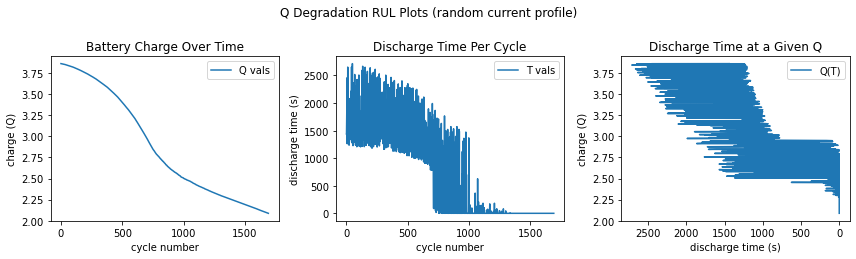

In [218]:
# create the cell
# with open('params/battery_params.json') as f:
#     battery_params = json.load(f)
cbcell = ContinuousBatteryCell(**battery_params)

# define some data containers
q_vals = []
t_vals = []
run_num = 1

# simulate until EOL
while(cbcell.age < .9*cbcell.eol):
    # discharge
    cycle_test(cell=cbcell, random_load=True, c=8.2, reset=False,verbose=1, dt=1.0, run_num=run_num, q_vals=q_vals, t_vals=t_vals)
    # charge
    cycle_test(cell=cbcell, random_load=False, verbose=1, show_plot=False, reset=False, action=0, run_num=run_num)
    run_num += 1

run_num = run_num-1
    # plot the results
three_plot(title="Q Degradation RUL Plots (random current profile)", figsize=(12,4), 
           plot1=np.array([np.arange(0, run_num), np.array(q_vals[0:run_num])]),
           plot2=np.array([np.arange(0, run_num), np.array(t_vals[0:run_num])]), 
           plot3=np.array([np.array(t_vals[0:run_num]), np.array(q_vals[0:run_num])]),
           label1=["Q vals"],
           label2=["T vals"],
           label3=["Q(T)"],
           title1="Battery Charge Over Time",
           title2="Discharge Time Per Cycle",
           title3="Discharge Time at a Given Q",
           axes1=['cycle number', 'charge (Q)'],
           axes2=['cycle number', 'discharge time (s)'],
           axes3=['discharge time (s)', 'charge (Q)'],
           invert = [0,0,1],
           save=False,
           filename="figures/rul_plots_random_load.png")

In [217]:
print(run_num)
load_checkpoint()

1196
[INFO] loading checkpoint: params\base\battery_params.json


{'name': 'base',
 'age': 0.0,
 'n_cells': 1,
 'z_coef': [1.435124598587402e-09,
  -4.3348814741614427e-07,
  5.2156350487442414e-05,
  -0.003107190766979779,
  0.09145584286510422,
  2.988938676108227],
 'r0_coef': [1.6543485815581432e-13,
  -1.396314324953787e-10,
  4.977472265111824e-08,
  -6.819295454775623e-06,
  0.00034812243660657313,
  0.008513118300358618],
 'q_coef': [2.8304488345207355e-13,
  -2.584507429004785e-10,
  6.232727892141627e-08,
  -1.33416936631132e-05,
  -0.0005960663784553936,
  3.8661065725628623],
 'eol': 412,
 'z': 1.0,
 'Ir': 0,
 'h': 0,
 'M0': 0.0019,
 'M': 0.0092,
 'R0': 0.0112,
 'R': 0.000283,
 'Q': 3.8695,
 'n': 0.9987,
 'G': 163.4413,
 'v0': 4.2,
 'eod': 3.04,
 'RC': 3.6572,
 'modified': '12_30_here'}